# 4. Evaluation Metrics for Classification

In [196]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [198]:
df = pd.read_csv('../03-classification/customers-data.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors = 'coerce')
df['totalcharges'] = df['totalcharges'].fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [199]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [200]:
numerical = ['tenure','monthlycharges','totalcharges']

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [201]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression().fit(X_train, y_train)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:,1]

churn_desition = y_pred >= 0.5
(churn_desition == y_val).mean()

/Users/polina_fuksman/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8026969481902059

# 4.2. Accuracy and dummy model

In [202]:
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    churn_desition = y_pred >= t
    score = (churn_desition == y_val).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


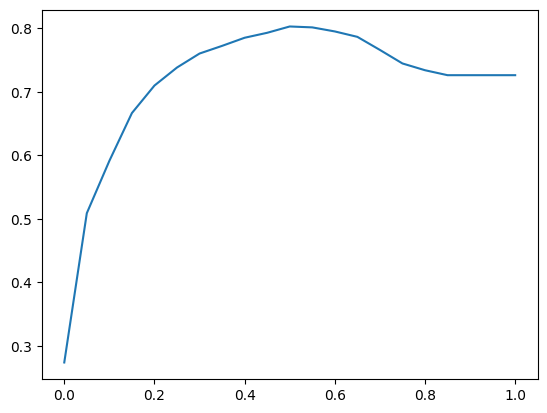

In [203]:
plt.plot(thresholds,scores)

In [204]:
from sklearn.metrics import accuracy_score

In [205]:
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [206]:
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [207]:
from collections import Counter

In [208]:
Counter(y_pred>= 1.0)

Counter({False: 1409})

# 4.3 Confusion table

In [209]:
actual_positiv = (y_val == 1)
actual_negative = (y_val == 0)

In [210]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [211]:
# true positive
tp = (predict_positive & actual_positiv).sum()

In [212]:
# true negative
tn = (predict_negative & actual_negative).sum()

In [213]:
# false positive 
fp = (predict_positive & actual_negative).sum()
# false negative
fn = (predict_negative & actual_positiv).sum()

In [214]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

confusion_matrix

array([[921, 102],
       [176, 210]])

In [215]:
((confusion_matrix / confusion_matrix.sum()).round(2))

array([[0.65, 0.07],
       [0.12, 0.15]])

# 4.4 Precision and Recall

In [216]:
# p - precision

p = tp / (tp + fp)
p

# 33% of users was not goining to churn

0.6730769230769231

In [217]:
tp + fp

312

In [218]:
tp

210

In [219]:
# r - recall

r = tp / (tp + fn)
r

# 46% of users we failed to identify

0.5440414507772021

# 4.5 ROC Curves

### TPR and FPR

In [220]:
# True positive rate (max true positive rate)

tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [221]:
# False positive rate (min false positive rate)

fpr = fp / (fp + tn)
fpr

0.09970674486803519

In [222]:
thresholds = np.linspace(0,1,101)
scores = []

for t in thresholds:
    actual_positiv = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    # true positive
    tp = (predict_positive & actual_positiv).sum()
    # true negative
    tn = (predict_negative & actual_negative).sum()
    
    # false positive 
    fp = (predict_positive & actual_negative).sum()
    # false negative
    fn = (predict_negative & actual_positiv).sum()

    scores.append([t, tp, fp, fn, tn])

In [223]:
columns = ['threshold','tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,102,176,921
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,2,373,1021
90,0.9,0,0,386,1023


In [224]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [225]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,912,1,111,0.997409,0.891496
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


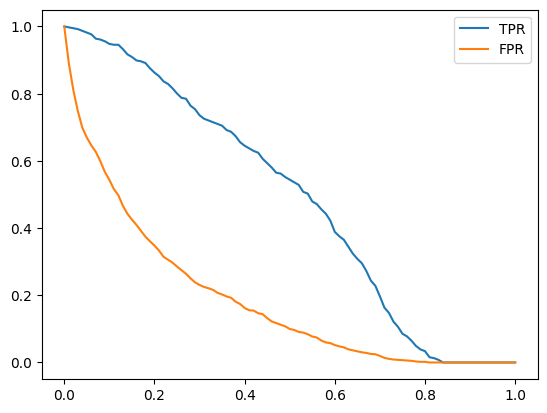

In [226]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'],label='FPR')
plt.legend()

### Random model

In [227]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))

In [228]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [229]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [230]:
def tpr_fpr_dataframe(y_val, y_pred):
    
    thresholds = np.linspace(0,1,101)
    scores = []
    
    for t in thresholds:
        actual_positiv = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        # true positive
        tp = (predict_positive & actual_positiv).sum()
        # true negative
        tn = (predict_negative & actual_negative).sum()
        
        # false positive 
        fp = (predict_positive & actual_negative).sum()
        # false negative
        fn = (predict_negative & actual_positiv).sum()
    
        scores.append([t, tp, fp, fn, tn])

    columns = ['threshold','tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores[::10]
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [231]:
df_random = tpr_fpr_dataframe(y_val, y_rand)

In [232]:
df_random[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


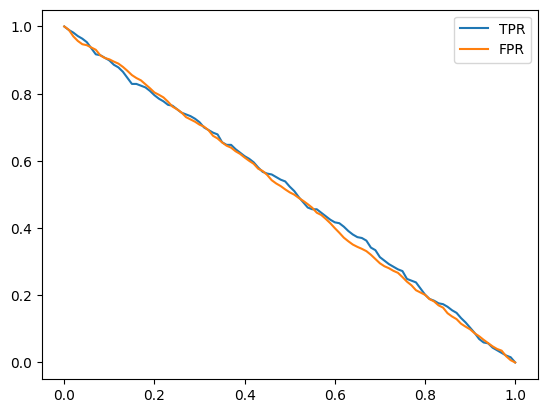

In [233]:
plt.plot(df_random['threshold'], df_random['tpr'], label='TPR')
plt.plot(df_random['threshold'], df_random['fpr'],label='FPR')
plt.legend()

### Random model

In [234]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [235]:
y_ideal = np.repeat([0,1],[num_neg,num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [236]:
y_ideal_pred = np.linspace(0,1,len(y_val))

In [237]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

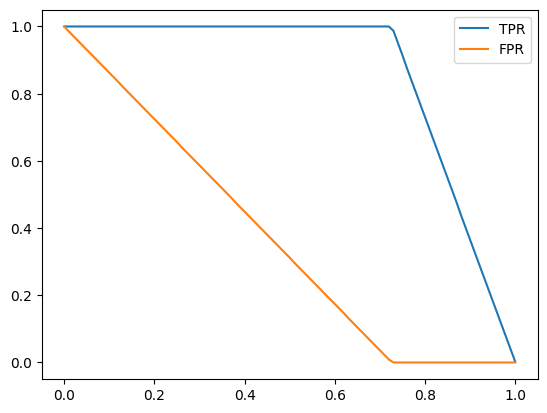

In [238]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR')
plt.plot(df_ideal['threshold'], df_ideal['fpr'],label='FPR')
plt.legend()

### Putting everything together

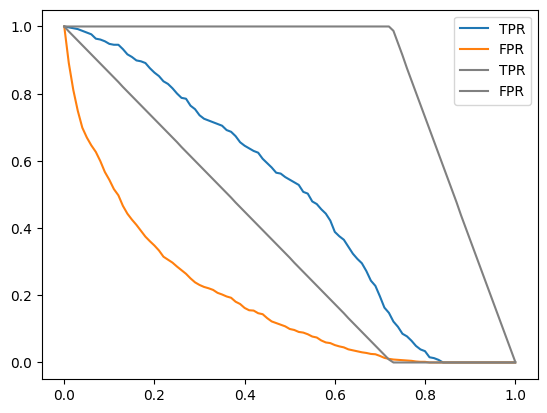

In [239]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='TPR')
plt.plot(df_scores['threshold'], df_scores['fpr'],label='FPR')

# plt.plot(df_random['threshold'], df_random['tpr'], label='TPR')
# plt.plot(df_random['threshold'], df_random['fpr'],label='FPR')

plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='TPR', color='grey')
plt.plot(df_ideal['threshold'], df_ideal['fpr'],label='FPR', color='grey')
plt.legend()

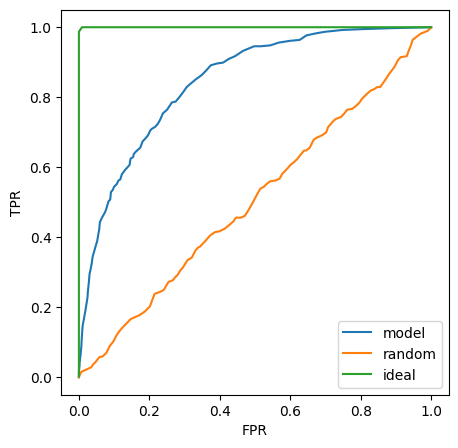

In [240]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_random.fpr, df_random.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

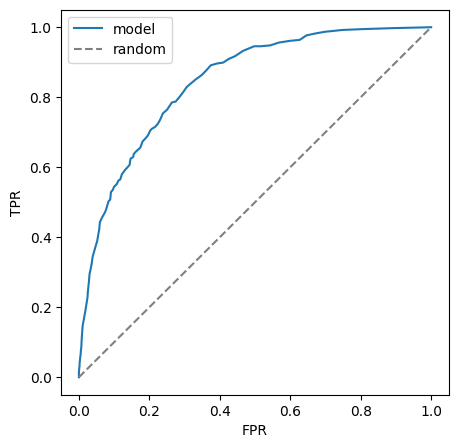

In [241]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
# plt.plot(df_random.fpr, df_random.tpr, label='random')
# plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
plt.plot([0,1], [0,1], label='random', linestyle='--', color='grey')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [242]:
from sklearn.metrics import roc_curve

In [243]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

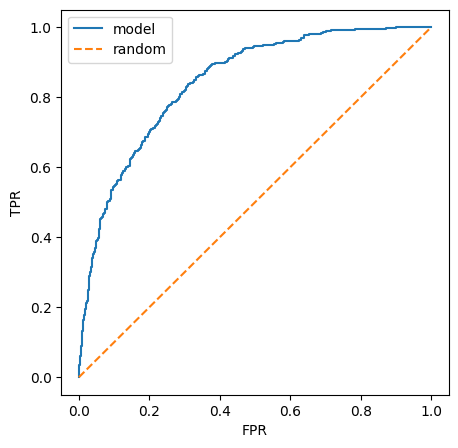

In [244]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random',linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

# 4.6. ROC AUC

In [245]:
from sklearn.metrics import auc

In [246]:
auc(fpr,tpr)

0.8438707651477165

In [247]:
auc(df_scores.fpr,df_scores.tpr)

0.8437340140499091

In [248]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [249]:
auc(df_random.fpr,df_random.tpr)

0.5060233793728696

In [250]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr,tpr)

0.8438707651477165

In [251]:
# shortcut
from sklearn.metrics import roc_auc_score

In [252]:
roc_auc_score(y_val, y_pred)

0.8438707651477165

In [253]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [254]:
import random

In [255]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [256]:
pos[pos_ind] > neg[neg_ind]

True

In [257]:
n = 10000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success += 1

success / n

0.8416

In [258]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [259]:
(pos[pos_ind] > neg[neg_ind]).mean()

0.84656

# 4.7. Cross-Validation

In [260]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)

    return dv, model

In [261]:
dv, model = train(df_train, y_train, C=0.001)

In [262]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]

    return y_pred

In [263]:
X_pred = predict(df_val, dv, model)

In [264]:
from sklearn.model_selection import KFold

In [265]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [266]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [267]:
len(train_idx), len(val_idx)

(5070, 564)

In [268]:
len(df_full_train)

5634

In [269]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [270]:
#!pip install tqdm

In [271]:
from tqdm.auto import tqdm

In [272]:
# in one function

n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in tqdm(kfold.split(df_full_train), total=n_splits):
    
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.01 0.840 +- 0.008


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.1 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=0.5 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=1 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=5 0.842 +- 0.007


  0%|          | 0/5 [00:00<?, ?it/s]

C=10 0.842 +- 0.007


In [273]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8584519592230275